In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
ff=pd.read_csv("forestfires.csv")

In [3]:
ff

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [4]:
ff.duplicated().sum()

8

In [5]:
# dropping duplicated in whole data
ff1=ff.drop_duplicates()

In [6]:
ff1.duplicated().sum()

0

In [7]:
ff1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          509 non-null    object 
 1   day            509 non-null    object 
 2   FFMC           509 non-null    float64
 3   DMC            509 non-null    float64
 4   DC             509 non-null    float64
 5   ISI            509 non-null    float64
 6   temp           509 non-null    float64
 7   RH             509 non-null    int64  
 8   wind           509 non-null    float64
 9   rain           509 non-null    float64
 10  area           509 non-null    float64
 11  dayfri         509 non-null    int64  
 12  daymon         509 non-null    int64  
 13  daysat         509 non-null    int64  
 14  daysun         509 non-null    int64  
 15  daythu         509 non-null    int64  
 16  daytue         509 non-null    int64  
 17  daywed         509 non-null    int64  
 18  monthapr  

In [8]:
ff1.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
ff1.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998,0.020889,...,-0.136614,-0.281054,-0.455128,0.033137,-0.041972,-0.074706,-0.036983,-0.088879,-0.005172,0.080444
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932,-0.011152,...,-0.177044,-0.319691,-0.106256,0.000617,-0.047759,-0.404974,-0.082312,-0.074642,-0.188126,0.119779
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542,-0.001642,...,-0.106347,-0.402201,-0.115871,-0.101518,-0.178719,-0.648890,-0.115010,-0.078927,0.094091,0.538299
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429,0.051599,...,-0.162761,-0.250494,-0.103846,0.020932,0.119765,-0.143589,-0.060655,-0.076748,-0.071401,-0.069600
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173,-0.077766,...,-0.329774,-0.319901,-0.146547,0.143987,0.052779,-0.342129,-0.045372,-0.053720,-0.052918,0.091428
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554,0.069599,...,-0.047670,0.141593,0.171900,0.013808,0.014425,-0.083581,0.087384,-0.035967,-0.072335,-0.061631
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623,0.121056,...,0.270919,-0.028820,-0.070217,-0.039880,0.010124,0.181610,0.015311,0.012049,-0.053404,-0.180211
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511,-0.001723,...,-0.009262,-0.013961,-0.004336,-0.012411,-0.012437,-0.019189,-0.004336,-0.003063,-0.012030,-0.049319
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000,-0.052390,...,0.000706,-0.021205,-0.012737,0.005566,-0.019083,-0.048394,0.006124,-0.008997,-0.017284,0.055191
dayfri,0.020889,-0.011152,-0.001642,0.051599,-0.077766,0.069599,0.121056,-0.001723,-0.052390,1.000000,...,-0.018868,0.047592,-0.027723,-0.048598,-0.018562,0.041050,0.057284,-0.019584,-0.045470,0.111903


In [10]:
ff1.shape

(509, 31)

In [11]:
ff1['size_category'].unique()

array(['small', 'large'], dtype=object)

# Doing labelencoding to convert into categorical data

In [12]:
label_encoder=preprocessing.LabelEncoder()

In [13]:
ff['size_c']=label_encoder.fit_transform(ff['size_category'])

In [14]:
ff[['size_category','size_c']]

,size_category,size_c
0,small,1
1,small,1
2,small,1
3,small,1
4,small,1
...,...,...
512,large,0
513,large,0
514,large,0
515,small,1


In [15]:
ff1=ff.drop(columns=(['month','day','size_category']),axis=1)

In [16]:
ff1.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_c'],
      dtype='object')

In [17]:
ff1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_c
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [18]:
ff1.shape

(517, 29)

In [19]:
ff1.shape

(517, 29)

In [20]:
x=ff1.iloc[:,:-1]
y=ff1.iloc[:,-1]

In [21]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_c, Length: 517, dtype: int32

# Splitting data into test aqnd train 

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [24]:
x_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
217,88.6,91.8,709.9,7.1,12.4,73,6.3,0.0,30.32,0,...,0,0,0,0,0,0,0,0,0,1
56,90.3,80.7,730.2,6.3,17.8,63,4.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
37,90.0,41.5,682.6,8.7,11.3,60,5.4,0.0,0.00,1,...,0,0,0,0,0,0,0,0,1,0
66,92.4,117.9,668.0,12.2,23.0,37,4.5,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,1
492,95.9,158.0,633.6,11.3,32.4,27,2.2,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,84.4,73.4,671.9,3.2,17.9,45,3.1,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
369,91.0,276.3,825.1,7.1,13.8,77,7.6,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
320,92.8,119.0,783.5,7.5,18.9,34,7.2,0.0,34.36,0,...,0,0,0,0,0,0,0,0,0,1
125,92.6,46.5,691.8,8.8,20.6,24,5.4,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
y_train

217    0
56     1
37     1
66     1
492    1
      ..
123    1
369    1
320    0
125    1
265    1
Name: size_c, Length: 361, dtype: int32

In [26]:
x_test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
293,93.1,180.4,430.8,11.0,26.9,28,5.4,0.0,86.45,0,...,0,0,0,1,0,0,0,0,0,0
336,91.6,108.4,764.0,6.2,19.3,44,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
508,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
351,92.1,99.0,745.3,9.6,15.4,53,6.3,0.0,7.31,1,...,0,0,0,0,0,0,0,0,0,1
164,89.7,90.0,704.4,4.8,17.8,67,2.2,0.0,2.01,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,91.5,238.2,730.6,7.5,17.7,65,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
455,94.6,160.0,567.2,16.7,17.9,48,2.7,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,0
447,93.4,17.3,28.3,9.9,8.9,35,8.0,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
y_test

293    0
336    1
508    1
351    0
164    1
      ..
452    1
455    1
447    1
299    1
126    1
Name: size_c, Length: 156, dtype: int32

# Creating model

In [28]:
import tensorflow as tf

In [29]:
model1=tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(42,input_dim=28,activation='ReLU'))
model1.add(tf.keras.layers.Dense(28,activation='ReLU'))
model1.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [30]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 42)                1218      
                                                                 
 dense_1 (Dense)             (None, 28)                1204      
                                                                 
 dense_2 (Dense)             (None, 1)                 29        
                                                                 
Total params: 2,451
Trainable params: 2,451
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Model Compilation
model1.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
#Model Fitting
history=model1.fit(x_train, y_train, validation_data=(x_test,y_test),epochs =50, batch_size=10)

Epoch 1/50
37/37 [==============================] - 1s 5ms/step - loss: 2.1325 - accuracy: 0.7091 - val_loss: 3.1423 - val_accuracy: 0.3846
Epoch 2/50
37/37 [==============================] - 0s 2ms/step - loss: 0.8766 - accuracy: 0.7230 - val_loss: 0.8668 - val_accuracy: 0.6218
Epoch 3/50
37/37 [==============================] - 0s 2ms/step - loss: 0.7443 - accuracy: 0.7784 - val_loss: 0.7636 - val_accuracy: 0.6346
Epoch 4/50
37/37 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8310 - val_loss: 0.3089 - val_accuracy: 0.8654
Epoch 5/50
37/37 [==============================] - 0s 2ms/step - loss: 0.2691 - accuracy: 0.8975 - val_loss: 0.8450 - val_accuracy: 0.8269
Epoch 6/50
37/37 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8698 - val_loss: 0.4862 - val_accuracy: 0.7564
Epoch 7/50
37/37 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.8532 - val_loss: 0.9025 - val_accuracy: 0.4744
Epoch 8/50
37/37 [==

In [33]:
model1.save_weights("mywt.kmw")

# evaluate the model

In [34]:
scores = model1.evaluate(x_train,y_train)
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

12/12 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 0.9778
accuracy: 97.78%


# Visualizing training history

In [35]:
model1.history.history.keys()
import matplotlib.pyplot as plt

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

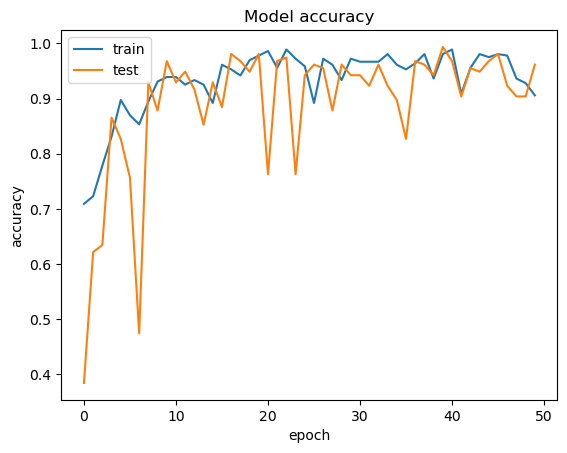

In [37]:
# summarizing history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

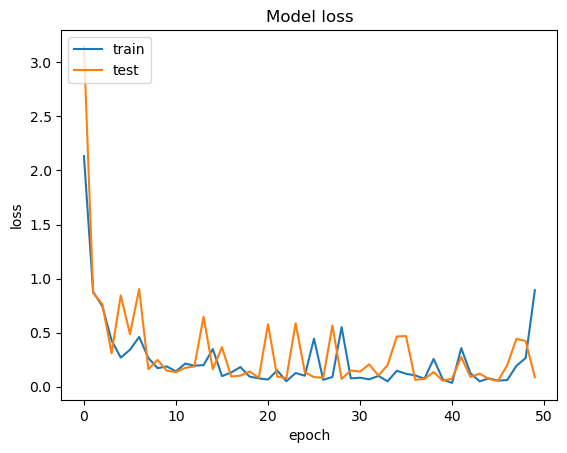

In [38]:
# summarizing history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluation of the model

In [39]:
y_train_pred= model1.predict(x_train)
y_test_pred= model1.predict(x_test)
from sklearn.metrics import mean_squared_error
train_rmse = mean_squared_error(y_train,y_train_pred,squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred,squared=False)

print('Training set rmse: %.3f, Testing set rmse: %.3f' % (train_rmse, test_rmse))

5/5 [==============================] - 0s 4ms/step
Training set rmse: 0.114, Testing set rmse: 0.166


In [40]:
from sklearn.model_selection import RandomizedSearchCV,KFold
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor

In [41]:
def keras_reg_model(learning_rate,activation_function,init,neuron1,neuron2):
    model2 = tf.keras.models.Sequential()
    model2.add(tf.keras.layers.Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model2.add(tf.keras.layers.Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model2.add(tf.keras.layers.Dense(1,activation = 'linear'))
    adam = Adam(lr = learning_rate)
    model2.compile(loss = 'mse',optimizer = adam,metrics = ['mse','mae'])
    return model2

In [42]:
keras_reg=KerasRegressor(build_fn=keras_reg_model,verbose=0)

In [43]:
# Define the search parameters

batch_size = [10,50,100,500,1000,2000]
epochs = [25,50,80,100,150]
learning_rate = [0.001,0.01,0.1]
activation_function = ['elu','relu','linear']
init = ['uniform','normal','zero']
neuron1 = [5,10,20,30]
neuron2 = [5,10,20,30]
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)
random_search = RandomizedSearchCV(estimator = keras_reg,param_distributions = param_grids,cv = 5,n_jobs=-1,verbose = 28,random_state=40)
random_result = random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


# Summarize the results

In [44]:
print('Best score:',random_result.best_score_)
print('Best parameters:',random_result.best_params_)

Best score: -0.11159200519323349
Best parameters: {'neuron2': 30, 'neuron1': 30, 'learning_rate': 0.001, 'init': 'normal', 'epochs': 150, 'batch_size': 1000, 'activation_function': 'relu'}


In [45]:
ddd= random_result.best_params_
keras_tuned=keras_reg_model(learning_rate=ddd['learning_rate'],activation_function=ddd['activation_function'],init=ddd['init'],
                                                                                       neuron1=ddd['neuron1'],neuron2=ddd['neuron2'])
history2=keras_tuned.fit(x_train, y_train, validation_data=(x_test,y_test),
                         epochs =ddd['epochs'],batch_size=ddd['batch_size'])

Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 12.9962 - mse: 12.9962 - mae: 3.2232 - val_loss: 3.2788 - val_mse: 3.2788 - val_mae: 1.5784
Epoch 2/150
1/1 [==============================] - 0s 59ms/step - loss: 3.9081 - mse: 3.9081 - mae: 1.6967 - val_loss: 0.5550 - val_mse: 0.5550 - val_mae: 0.5939
Epoch 3/150
1/1 [==============================] - 0s 54ms/step - loss: 0.6970 - mse: 0.6970 - mae: 0.6583 - val_loss: 2.0078 - val_mse: 2.0078 - val_mae: 1.2507
Epoch 4/150
1/1 [==============================] - 0s 64ms/step - loss: 1.8703 - mse: 1.8703 - mae: 1.1964 - val_loss: 4.1075 - val_mse: 4.1075 - val_mae: 1.8434
Epoch 5/150
1/1 [==============================] - 0s 65ms/step - loss: 3.8798 - mse: 3.8798 - mae: 1.7632 - val_loss: 4.6604 - val_mse: 4.6604 - val_mae: 1.9673
Epoch 6/150
1/1 [==============================] - 0s 57ms/step - loss: 4.4183 - mse: 4.4183 - mae: 1.8893 - val_loss: 3.7839 - val_mse: 3.7839 - val_mae: 1.7576
Epoch 7/150
1/1 [===========

1/1 [==============================] - 0s 64ms/step - loss: 0.1621 - mse: 0.1621 - mae: 0.3037 - val_loss: 0.1884 - val_mse: 0.1884 - val_mae: 0.3199
Epoch 52/150
1/1 [==============================] - 0s 73ms/step - loss: 0.1568 - mse: 0.1568 - mae: 0.3180 - val_loss: 0.1855 - val_mse: 0.1855 - val_mae: 0.3339
Epoch 53/150
1/1 [==============================] - 0s 54ms/step - loss: 0.1547 - mse: 0.1547 - mae: 0.3330 - val_loss: 0.1829 - val_mse: 0.1829 - val_mae: 0.3449
Epoch 54/150
1/1 [==============================] - 0s 62ms/step - loss: 0.1551 - mse: 0.1551 - mae: 0.3448 - val_loss: 0.1801 - val_mse: 0.1801 - val_mae: 0.3512
Epoch 55/150
1/1 [==============================] - 0s 50ms/step - loss: 0.1564 - mse: 0.1564 - mae: 0.3519 - val_loss: 0.1761 - val_mse: 0.1761 - val_mae: 0.3524
Epoch 56/150
1/1 [==============================] - 0s 61ms/step - loss: 0.1565 - mse: 0.1565 - mae: 0.3532 - val_loss: 0.1706 - val_mse: 0.1706 - val_mae: 0.3482
Epoch 57/150
1/1 [=================

1/1 [==============================] - 0s 54ms/step - loss: 0.1126 - mse: 0.1126 - mae: 0.2722 - val_loss: 0.1208 - val_mse: 0.1208 - val_mae: 0.2755
Epoch 102/150
1/1 [==============================] - 0s 64ms/step - loss: 0.1121 - mse: 0.1121 - mae: 0.2701 - val_loss: 0.1202 - val_mse: 0.1202 - val_mae: 0.2732
Epoch 103/150
1/1 [==============================] - 0s 65ms/step - loss: 0.1116 - mse: 0.1116 - mae: 0.2677 - val_loss: 0.1197 - val_mse: 0.1197 - val_mae: 0.2711
Epoch 104/150
1/1 [==============================] - 0s 63ms/step - loss: 0.1111 - mse: 0.1111 - mae: 0.2654 - val_loss: 0.1194 - val_mse: 0.1194 - val_mae: 0.2696
Epoch 105/150
1/1 [==============================] - 0s 63ms/step - loss: 0.1106 - mse: 0.1106 - mae: 0.2635 - val_loss: 0.1192 - val_mse: 0.1192 - val_mae: 0.2687
Epoch 106/150
1/1 [==============================] - 0s 66ms/step - loss: 0.1101 - mse: 0.1101 - mae: 0.2622 - val_loss: 0.1189 - val_mse: 0.1189 - val_mae: 0.2684
Epoch 107/150
1/1 [===========

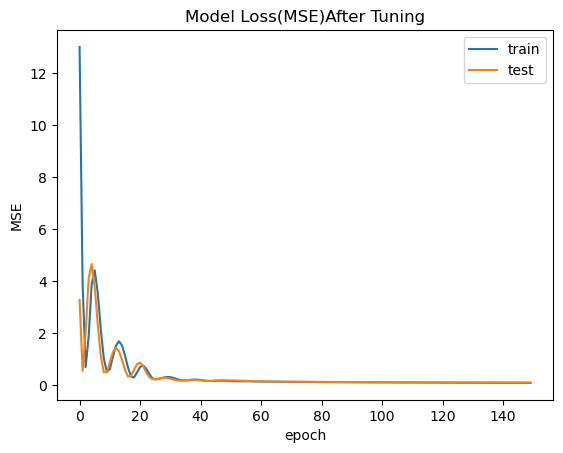

In [46]:
# PLotting Loss(MSE) After Tuning

plt.title('Model Loss(MSE)After Tuning')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.ylabel('MSE')
plt.xlabel('epoch')

plt.legend()
plt.show()

In [47]:
# evaluate the model

y_train_pred_tuned= keras_tuned.predict(x_train)
y_test_pred_tuned= keras_tuned.predict(x_test)
from sklearn.metrics import mean_squared_error
train_rmse_tuned = mean_squared_error(y_train,y_train_pred_tuned,squared=False)
test_rmse_tuned = mean_squared_error(y_test, y_test_pred_tuned,squared=False)
print('Training set rmse : %.3f, Testing set rmse: %.3f' % (train_rmse_tuned, test_rmse_tuned))

5/5 [==============================] - 0s 2ms/step
Training set rmse : 0.303, Testing set rmse: 0.324


# Comparing base model and tuned mode

In [48]:
final=pd.DataFrame({'models':['base model','tuned model'],'train rmse':[train_rmse,train_rmse_tuned],
                     'test rmse':[test_rmse,test_rmse_tuned]})
final

,models,train rmse,test rmse
0,base model,0.113769,0.165722
1,tuned model,0.302813,0.324212
